# 30 Day Buyer Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import datetime

In [8]:
stock=pd.read_csv('all_stock.csv')
stock['submitted_date']=pd.to_datetime(stock['submitted_date'])

In [10]:
stock=stock.sort_values(by='submitted_date', ascending=False)

In [13]:
stock_30=stock[stock['submitted_date']>datetime.datetime(2021,5,9)]
stock_30.head()

,seller,seller_id,buyer,buyer_id,item_id,title,brand_name,category_name,price,submitted_date
11915,RTN+loveluxe,199748,my next fit,216951,2605647,Chanel Quilted Tote,Chanel,Totes,485.0,2021-06-09 19:35:00
11914,BrandJFA_WS,210205,harley 2019,204649,2766115,"Chanel Crossword Pochette Clutch, Lambskin",Chanel,Handbags,1544.0,2021-06-09 19:13:00
11913,yoogis_wholesale,209430,harley 2019,204649,2768722,Christian Dior Multicolor Butterfly Embroidere...,Christian Dior,Totes,2520.0,2021-06-09 19:13:00
11912,bagriculture+wholesaleseller,213070,harley 2019,204649,2796883,Fendi Large Mesh Black FF Tote Bag,Fendi,Totes,690.0,2021-06-09 19:13:00
11911,yoogis_wholesale,209430,harley 2019,204649,2768673,Chanel Black/White Woven Lambskin Leather Smal...,Chanel,Crossbody Bags,2053.0,2021-06-09 19:13:00


In [16]:
the_rr=stock_30[stock_30['buyer']=='the realreal']
ocs=stock_30[stock_30['buyer']=='one classy shop']
soth=stock_30[stock_30['buyer']=="sotheby's"]

In [18]:
# the_rr.to_excel('the_realreal_stock_30.xlsx')
# ocs.to_excel('one_classy_shop_stock_30.xlsx')
# soth.to_excel('sothebys_stock_30.xlsx')

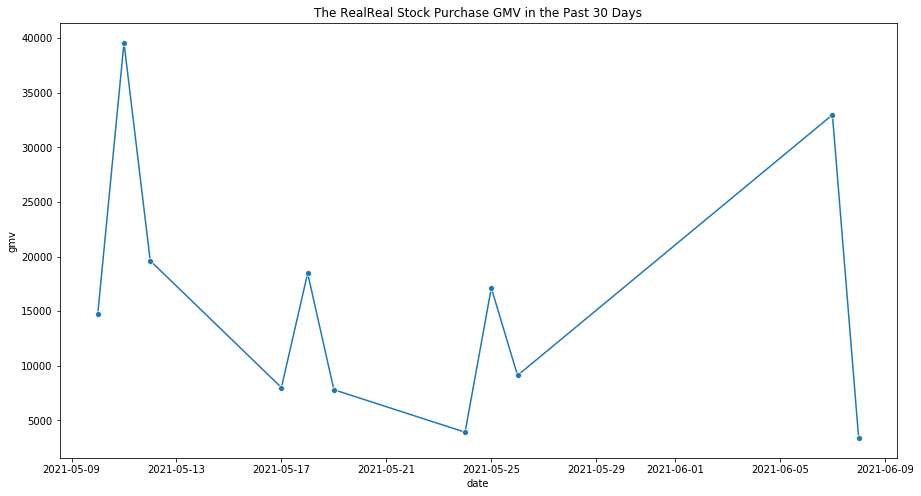

In [36]:
plt.figure(figsize=(15,8))
sns.lineplot(x=the_rr['submitted_date'].dt.date.unique(),
             y=list(the_rr.groupby(['submitted_date'])['price'].sum()), marker='o')
plt.title('The RealReal Stock Purchase GMV in the Past 30 Days')
plt.ylabel('gmv')
plt.xlabel('date')
plt.show()

In [60]:
rr_top5=list(the_rr['brand_name'].value_counts()[:5].index)

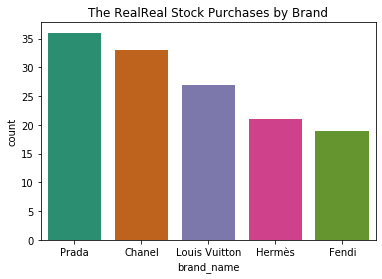

In [64]:
sns.countplot(x='brand_name', data=the_rr[the_rr['brand_name'].isin(rr_top5)], palette='Dark2',
              order=['Prada', 'Chanel', 'Louis Vuitton', 'Hermès', 'Fendi'])
plt.title('The RealReal Stock Purchases by Brand')
plt.show()

In [42]:
print('average price of stock item purchase: ${:.2f}'.format(the_rr['price'].mean()))

average price of stock item purchase: $1085.00


In [79]:
rr_prada=the_rr[the_rr['brand_name']=='Prada']

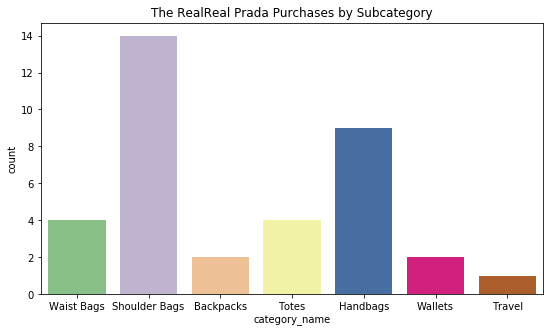

In [85]:
plt.figure(figsize=(9,5))
sns.countplot(x='category_name', data=rr_prada, palette='Accent')
plt.title('The RealReal Prada Purchases by Subcategory')
plt.show()

In [86]:
rr_prada['price'].mean()

422.28194444444443

In [91]:
len(rr_prada[rr_prada['title'].str.contains('Nylon')])/len(rr_prada)*100

66.66666666666666

In [96]:
rr_chanel=the_rr[the_rr['brand_name']=='Chanel']

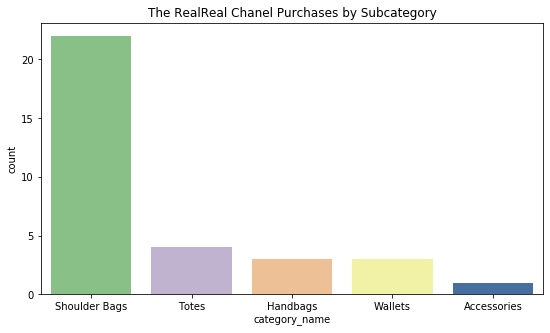

In [102]:
plt.figure(figsize=(9,5))
sns.countplot(x='category_name', data=rr_chanel, palette='Accent')
plt.title('The RealReal Chanel Purchases by Subcategory')
plt.show()

In [105]:
rr_chanel[rr_chanel['category_name']=='Shoulder Bags']

,seller,seller_id,buyer,buyer_id,item_id,title,brand_name,category_name,price,submitted_date
11767,BrandOff,202899,the realreal,200963,2797854,"Chanel Maxi Classic Double Flap Bag, Lambskin",Chanel,Shoulder Bags,4860.0,2021-06-08 14:44:00
11285,RS_JapanWholesale,215421,the realreal,200963,2734146,Auth Chanel Lambskin Bijou Rhinestone Coco Mar...,Chanel,Shoulder Bags,3460.0,2021-05-26 11:49:00
11287,RS_JapanWholesale,215421,the realreal,200963,2734033,"Chanel Vintage Medium Classic Double Flap Bag,...",Chanel,Shoulder Bags,3259.0,2021-05-26 11:49:00
11288,RS_JapanWholesale,215421,the realreal,200963,2733980,Auth Chanel Chanel Lambskin Cocomark Fringe Ch...,Chanel,Shoulder Bags,1760.0,2021-05-26 11:49:00
11290,RS_JapanWholesale,215421,the realreal,200963,2733988,Auth Chanel Matrasse Coco Mark Women's Leather...,Chanel,Shoulder Bags,1695.0,2021-05-26 11:49:00
11248,galleryrare,218843,the realreal,200963,2737504,"Chanel Medium Vintage Classic Double Flap Bag,...",Chanel,Shoulder Bags,3986.0,2021-05-25 18:48:00
11037,huntstreetwholesale,207025,the realreal,200963,2729643,Chanel Vintage Patent Double Sided Flap Bag,Chanel,Shoulder Bags,2659.0,2021-05-24 19:41:00
11039,jeannette+dct-ep,202972,the realreal,200963,2702990,CHANEL Caviar Skin Chain Tote Bag Black 3636723,Chanel,Shoulder Bags,1662.0,2021-05-24 19:41:00
10952,huntstreetwholesale,207025,the realreal,200963,2696260,Chanel Lambskin Jumbo Double Flap Bag,Chanel,Shoulder Bags,4182.0,2021-05-19 18:00:00
10922,BrandOff,202899,the realreal,200963,2695759,CHANEL Coco cocoon Shoulder Bag Nylon,Chanel,Shoulder Bags,989.0,2021-05-18 19:11:00


In [106]:
rr_chanel['price'].mean()

2344.3939393939395

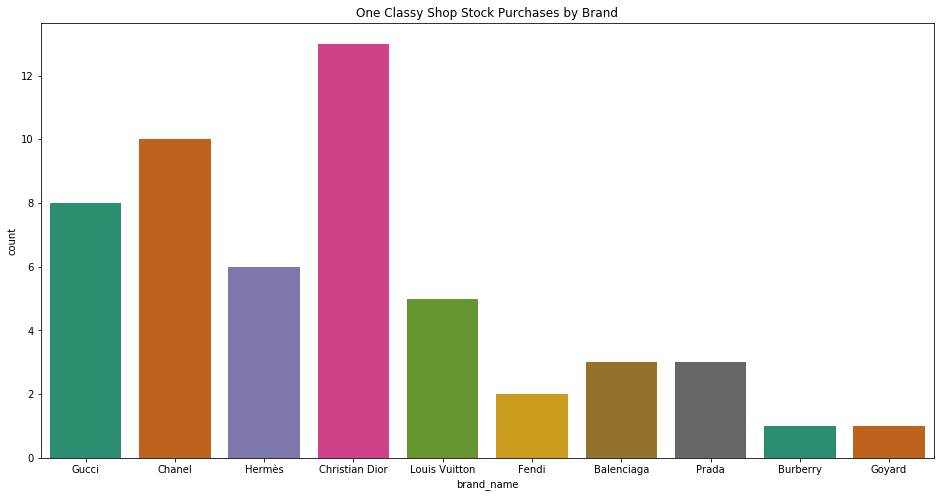

In [112]:
plt.figure(figsize=(16,8))
sns.countplot(x='brand_name', data=ocs, palette='Dark2')
plt.title('One Classy Shop Stock Purchases by Brand')
plt.show()

In [113]:
ocs['price'].mean()

1483.0013461538463

In [114]:
ocs_dior=ocs[ocs['brand_name']=='Christian Dior']
ocs_dior

,seller,seller_id,buyer,buyer_id,item_id,title,brand_name,category_name,price,submitted_date
11416,huntstreetwholesale,207025,one classy shop,203441,2696279,Christian Dior Tricolor Medium Lady Dior Bag,Christian Dior,Totes,2381.00,2021-05-28 16:30:00
11328,jeannette+dct-ep,202972,one classy shop,203441,2702952,Christian Dior Trotter Canvas Leather Saddle B...,Christian Dior,Shoulder Bags,836.00,2021-05-26 18:15:00
11327,jeannette+dct-ep,202972,one classy shop,203441,2702950,Christian Dior Trotter Canvas Leather Saddle B...,Christian Dior,Shoulder Bags,817.00,2021-05-26 18:15:00
11326,jeannette+dct-ep,202972,one classy shop,203441,2702949,Christian Dior Trotter Canvas Leather Saddle B...,Christian Dior,Shoulder Bags,836.00,2021-05-26 18:15:00
11325,BrandOff,202899,one classy shop,203441,2737125,Christian Dior Saddle Small Shoulder Bag Black...,Christian Dior,Shoulder Bags,1453.00,2021-05-26 18:15:00
11324,RS_JapanWholesale,215421,one classy shop,203441,2734065,"Christian Dior Saddle Pochette, Diorissimo Canvas",Christian Dior,Shoulder Bags,619.00,2021-05-26 18:15:00
11323,luxegetup_WS,218521,one classy shop,203441,2735803,Dior American Saddle Bag,Christian Dior,Shoulder Bags,506.00,2021-05-26 18:15:00
11322,Camille+brandstreetTokyo,206687,one classy shop,203441,2729115,CHRISTIAN DIOR Trotter Canvas Saddle Coin Purs...,Christian Dior,Wallets,279.00,2021-05-26 18:15:00
11321,RS_JapanWholesale,215421,one classy shop,203441,2734131,Christian Dior Saddle Pochette,Christian Dior,Shoulder Bags,904.00,2021-05-26 18:15:00
11320,luxegetup_WS,218521,one classy shop,203441,2735825,Dior American Saddle Bag,Christian Dior,Shoulder Bags,449.65,2021-05-26 18:15:00


In [116]:
len(ocs_dior[ocs_dior['title'].str.contains('Canvas')])

7

In [117]:
len(ocs_dior)

13

In [118]:
7/13

0.5384615384615384

In [119]:
ocs_dior['price'].mean()

1188.2807692307692

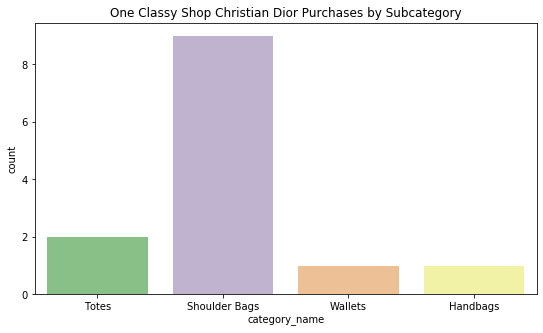

In [120]:
plt.figure(figsize=(9,5))
sns.countplot(x='category_name', data=ocs_dior, palette='Accent')
plt.title('One Classy Shop Christian Dior Purchases by Subcategory')
plt.show()

In [121]:
ocs_chanel=ocs[ocs['brand_name']=='Chanel']
ocs_chanel

,seller,seller_id,buyer,buyer_id,item_id,title,brand_name,category_name,price,submitted_date
11423,yoogis_wholesale,209430,one classy shop,203441,2741494,Chanel Blue Transparent Quilted PVC Coco Splas...,Chanel,Totes,2514.0,2021-05-28 16:30:00
11418,bagriculture+wholesaleseller,213070,one classy shop,203441,2730467,Chanel B17k Cc Logo Saturn Brooch Planet Pin C...,Chanel,Brooches,733.0,2021-05-28 16:30:00
11417,huntstreetwholesale,207025,one classy shop,203441,2696267,Chanel Striped Metallic 225 Reissue Accordion ...,Chanel,Shoulder Bags,2381.0,2021-05-28 16:30:00
11003,BrandJFA_WS,210205,one classy shop,203441,2654402,CHANEL CC Logos Clutch Party Bag 9606609 Black...,Chanel,Shoulder Bags,2733.0,2021-05-23 22:58:00
11005,BrandOff,202899,one classy shop,203441,2695718,CHANEL 2way Shoulder Bag Caviar,Chanel,Shoulder Bags,2522.0,2021-05-23 22:58:00
11009,RS_JapanWholesale,215421,one classy shop,203441,2618876,Chanel Patent Coco Mark Chain Tote Bag Black,Chanel,Shoulder Bags,1301.0,2021-05-23 22:58:00
10544,camille+glt,199623,one classy shop,203441,2650090,Chanel Ltd. Edition Boy Denim Patchwork Denim...,Chanel,Shoulder Bags,3903.0,2021-05-11 11:26:00
10542,RTN+loveluxe,199748,one classy shop,203441,2459961,Chanel Small Gold Cube Boy Bag,Chanel,Shoulder Bags,1837.0,2021-05-11 11:26:00
10546,BrandJFA_WS,210205,one classy shop,203441,2541591,CHANEL Quilted CC Single Chain Shoulder Bag Be...,Chanel,Shoulder Bags,2733.0,2021-05-11 11:26:00
10538,RS_JapanWholesale,215421,one classy shop,203441,2619025,Chanel Nylon Coco Mark W Chain Shoulder Bag Do...,Chanel,Shoulder Bags,2125.0,2021-05-11 11:04:00


In [122]:
ocs_chanel['price'].mean()

2278.2

In [129]:
ocs_hermes=ocs[ocs['brand_name']=='Hermès']
list(ocs_hermes['title'])

['Hermes 35cm Bi-Color Sanguine/White Clemence Leather Palladium Plated Birkin Bag',
 'Hermes Silk Scarf Carre Alfie 25th Anniversary Aube Dawn',
 'Hermes Email Snowflake Cloisonné BangleGold,',
 'Hermès Rose Tyrien Epsom Evelyne Pm',
 'HERMES Jypsiere 28 Shoulder Bag Taurillon Clemence Stamp P',
 'Hermès Bamboo Green Jypsiere 28 - Green']

In [130]:
ocs_hermes['price'].mean()

3393.3333333333335

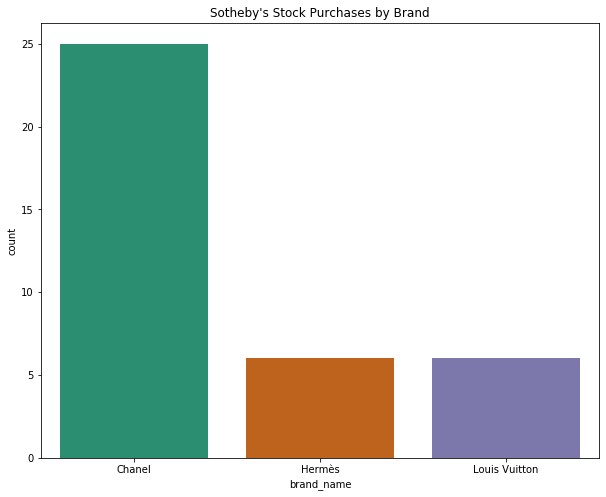

In [134]:
plt.figure(figsize=(10,8))
sns.countplot(x='brand_name', data=soth, palette='Dark2')
plt.title("Sotheby's Stock Purchases by Brand")
plt.show()

In [135]:
soth['price'].mean()

3215.078378378378

In [137]:
soth_chanel=soth[soth['brand_name']=='Chanel']
soth_chanel

,seller,seller_id,buyer,buyer_id,item_id,title,brand_name,category_name,price,submitted_date
11712,stylestainsWS,218877,sotheby's,214364,2739444,Chanel 21S Mini White Vanity Camellia Classic ...,Chanel,Shoulder Bags,2824.0,2021-06-08 09:31:00
11711,yoogis_wholesale,209430,sotheby's,214364,2768668,Chanel Black/White Quilted Caviar Leather Fili...,Chanel,Clutches,3546.0,2021-06-08 09:31:00
11713,stylestainsWS,218877,sotheby's,214364,2739443,Chanel 21S Mini Silver Caviar Vanity Top Handl...,Chanel,Shoulder Bags,2423.0,2021-06-08 09:31:00
11464,stylestainsWS,218877,sotheby's,214364,2739424,Chanel 21p Black Beige Raffia Cc Stripe Chain ...,Chanel,Shoulder Bags,2277.0,2021-06-01 16:42:00
11463,stylestainsWS,218877,sotheby's,214364,2739426,Chanel 21P Black Ribbon Round Circle Clutch On...,Chanel,Shoulder Bags,2386.0,2021-06-01 16:42:00
11465,stylestainsWS,218877,sotheby's,214364,2739442,Chanel 21S Mini Red Camellia Flower Vanity Cla...,Chanel,Shoulder Bags,2423.0,2021-06-01 16:42:00
11382,stylestainsWS,218877,sotheby's,214364,2739441,Chanel 21S Mini Pink Trendy Vanity Classic Cha...,Chanel,Shoulder Bags,2423.0,2021-05-27 19:10:00
11375,eladyGZ,218741,sotheby's,214364,2739923,Chanel CC Philigree Round Chain Shoulder Beige...,Chanel,Shoulder Bags,2263.0,2021-05-27 19:10:00
11376,stylestainsWS,218877,sotheby's,214364,2739419,Chanel 20S Circle Clutch On Chain Vanity Case ...,Chanel,Shoulder Bags,2386.0,2021-05-27 19:10:00
11377,stylestainsWS,218877,sotheby's,214364,2739407,Chanel 20B Round Circle Clutch Chain Purple Ir...,Chanel,Shoulder Bags,2386.0,2021-05-27 19:10:00


In [138]:
soth_chanel['price'].mean()

2642.68

In [143]:
len(soth_chanel[soth_chanel['title'].str.contains('Vanity')])/len(soth_chanel)*100

48.0

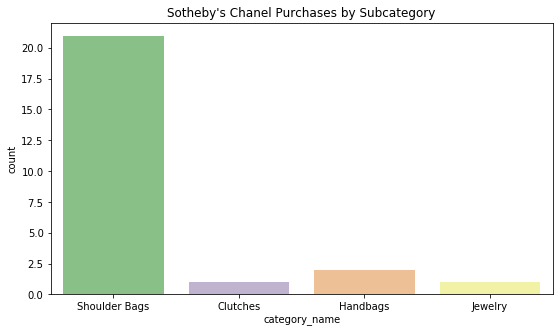

In [144]:
plt.figure(figsize=(9,5))
sns.countplot(x='category_name', data=soth_chanel, palette='Accent')
plt.title("Sotheby's Chanel Purchases by Subcategory")
plt.show()

In [148]:
soth_hermes=soth[soth['brand_name']=='Hermès']
soth_hermes

,seller,seller_id,buyer,buyer_id,item_id,title,brand_name,category_name,price,submitted_date
11390,stylestainsWS,218877,sotheby's,214364,2739482,Hermes Mini Constance 18 Bubblegum Pink 5P Eps...,Hermès,Shoulder Bags,14597.0,2021-05-27 19:33:00
11389,yoogis_wholesale,209430,sotheby's,214364,2741319,Hermes Bleu Electrique Swift Leather Jige Elan...,Hermès,Handbags,2518.9,2021-05-27 19:33:00
11330,BrandOff,202899,sotheby's,214364,2737172,HERMES Jige PM Pouch 1P Swift,Hermès,Clutches,2155.0,2021-05-26 20:53:00
10925,BrandJFA_WS,210205,sotheby's,214364,2487887,Hermès Kelly 32 Retourne 2 Way Handbag Orange ...,Hermès,Shoulder Bags,10364.0,2021-05-18 20:42:00
10924,huntstreetwholesale,207025,sotheby's,214364,2694728,Hermès Jaune Ambre Jige Duo Mini Clutch with C...,Hermès,Clutches,2804.0,2021-05-18 20:31:00
10912,BrandOff,202899,sotheby's,214364,2695903,HERMES Micro Rong Others,Hermès,Shoulder Bags,3602.0,2021-05-18 17:07:00


In [147]:
soth_hermes['price'].mean()

6006.816666666667

In [151]:
soth_lv=soth[soth['brand_name']=='Louis Vuitton']
list(soth_lv['title'])

['Auth Louis Vuitton Louis Vuitton Monogram Crows Soft Trunk Wallet Shoulder Bag B',
 "Auth Louis Vuitton Taiga M30339 Men's Shoulder Bag Black",
 "Auth Louis Vuitton Women's Handbag Brown,green,monogram",
 'LOUIS VUITTON Tambourin Shoulder Bag Autres Cuirs',
 'Louis Vuitton Shoulder Bag Monogram Multi Pochette Accessoir Khaki Brown Canvas Ladies M44813',
 'Louis Vuitton Monogram Graffiti Pochette Accessoire Brown PVC']

In [150]:
soth_lv['price'].mean()

2808.3333333333335

In [162]:
keeks=stock_30[stock_30['buyer']=='keeks handbags']
ebth=stock_30[stock_30['buyer']=='everything but the house']

In [196]:
# ebth.to_excel('ebth_stock_30.xlsx')

In [166]:
keeks

,seller,seller_id,buyer,buyer_id,item_id,title,brand_name,category_name,price,submitted_date
10883,camille+eLady_frontend,204684,keeks handbags,202311,2658726,Louis Vuitton Monogram Multicles 6 M62630 Mono...,Louis Vuitton,Accessories,186.0,2021-05-18 15:35:00
10882,Camille+brandstreetTokyo,206687,keeks handbags,202311,2694361,Louis Vuitton Damier Azur Pochette Cles Coin P...,Louis Vuitton,Wallets,185.0,2021-05-18 15:35:00
10884,camille+eLady_frontend,204684,keeks handbags,202311,2658704,Louis Vuitton Damier Multicle 6 N62630 Damier ...,Louis Vuitton,Accessories,186.0,2021-05-18 15:35:00


In [170]:
ebth_top5=list(ebth['brand_name'].value_counts().index)[:5]

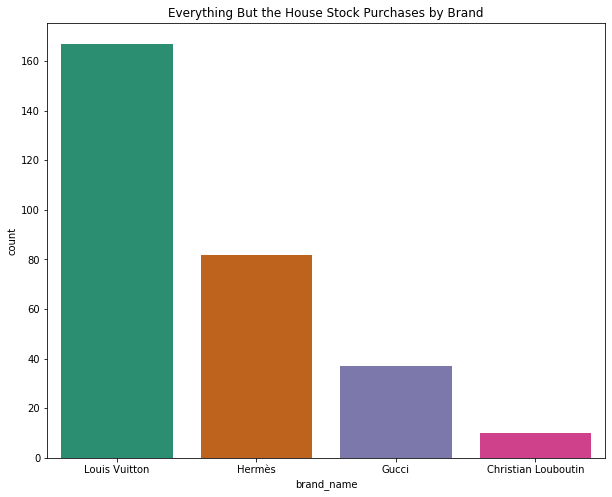

In [172]:
plt.figure(figsize=(10,8))
sns.countplot(x='brand_name', data=ebth[ebth['brand_name'].isin(ebth_top5)], palette='Dark2',
             order=['Louis Vuitton', 'Hermès', 'Gucci', 'Christian Louboutin'])
plt.title("Everything But the House Stock Purchases by Brand")
plt.show()

In [173]:
ebth['price'].mean()

302.86107871720117

In [198]:
ebth_lv=ebth[ebth['brand_name']=='Louis Vuitton']
ebth_lv.sort_values(by='price',ascending=False)

,seller,seller_id,buyer,buyer_id,item_id,title,brand_name,category_name,price,submitted_date
11183,camille+brandear,205747,everything but the house,216378,2658333,"Louis Vuitton Neverfull MM, Damier Azur",Louis Vuitton,Totes,925.0,2021-05-25 18:08:00
11180,camille+brandear,205747,everything but the house,216378,2657966,"Louis Vuitton Neverfull Pm, Monogram",Louis Vuitton,Shoulder Bags,814.0,2021-05-25 18:08:00
11735,yoogis_wholesale,209430,everything but the house,216378,2768896,"Louis Vuitton Alma Pm, Monogram Vernis",Louis Vuitton,Shoulder Bags,747.0,2021-06-08 13:49:00
11179,camille+brandear,205747,everything but the house,216378,2696904,"Louis Vuitton Neverfull Mm, Monogram",Louis Vuitton,Shoulder Bags,708.0,2021-05-25 18:08:00
11175,Next Innovation,198548,everything but the house,216378,2736117,Louis Vuitton Damier Azur Neverfull PM,Louis Vuitton,Totes,684.0,2021-05-25 18:08:00
...,...,...,...,...,...,...,...,...,...,...
11227,luxegetup_WS,218521,everything but the house,216378,2735922,Louis Vuittion Damier Wallet,Louis Vuitton,Wallets,105.0,2021-05-25 18:08:00
11228,luxegetup_WS,218521,everything but the house,216378,2735944,Louis Vuitton Coin Pouch,Louis Vuitton,Pouches,105.0,2021-05-25 18:08:00
10720,bagriculture+wholesaleseller,213070,everything but the house,216378,2653308,Louis Vuitton #318 Silver Padlock and Key Cade...,Louis Vuitton,Small Accessories,103.0,2021-05-11 20:59:00
10719,bagriculture+wholesaleseller,213070,everything but the house,216378,2653041,Louis Vuitton Gold Tone Brass Lock and key set...,Louis Vuitton,Small Accessories,72.0,2021-05-11 20:59:00


In [187]:
ebth_hermes=ebth[ebth['brand_name']=='Hermès']
ebth_hermes

,seller,seller_id,buyer,buyer_id,item_id,title,brand_name,category_name,price,submitted_date
11789,Next Innovation,198548,everything but the house,216378,2799214,HERMES Scarf Pink,Hermès,Scarves/Wraps,180.0,2021-06-08 16:22:00
11792,Next Innovation,198548,everything but the house,216378,2799193,HERMES Scarf Ivory,Hermès,Scarves/Wraps,180.0,2021-06-08 16:22:00
11791,Next Innovation,198548,everything but the house,216378,2799212,HERMES Scarf Brown,Hermès,Scarves/Wraps,180.0,2021-06-08 16:22:00
11790,Next Innovation,198548,everything but the house,216378,2799211,HERMES Scarf Navy,Hermès,Scarves/Wraps,189.0,2021-06-08 16:22:00
11717,Camille+brandstreetTokyo,206687,everything but the house,216378,2795998,HERMES 60%Linen 40%Wool Baby Shoes,Hermès,Small Accessories,106.0,2021-06-08 13:49:00
...,...,...,...,...,...,...,...,...,...,...
10635,camille+vtt,199622,everything but the house,216378,2651391,Enamel Bangle Pm,Hermès,Bracelets,224.0,2021-05-11 15:59:00
10636,camille+eLady_frontend,204684,everything but the house,216378,2559245,Hermes Bangle Bracelet Silver Multicolor Enamel,Hermès,Bracelets,257.0,2021-05-11 15:59:00
10637,camille+vtt,199622,everything but the house,216378,2651340,Box Carf/Courchevel Mini Constance 70Size Belt,Hermès,Belts,428.0,2021-05-11 15:59:00
10519,camille+vtt,199622,everything but the house,216378,2644113,Silk Twilly Bride De Gala Heart,Hermès,Scarves/Wraps,160.0,2021-05-10 23:17:00


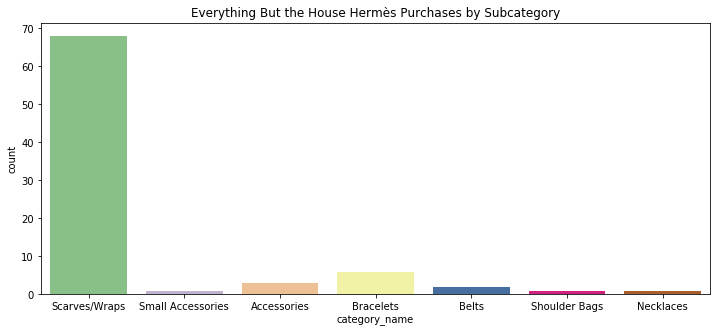

In [194]:
plt.figure(figsize=(12,5))
sns.countplot(x='category_name', data=ebth_hermes, palette='Accent')
plt.title("Everything But the House Hermès Purchases by Subcategory")
plt.show()

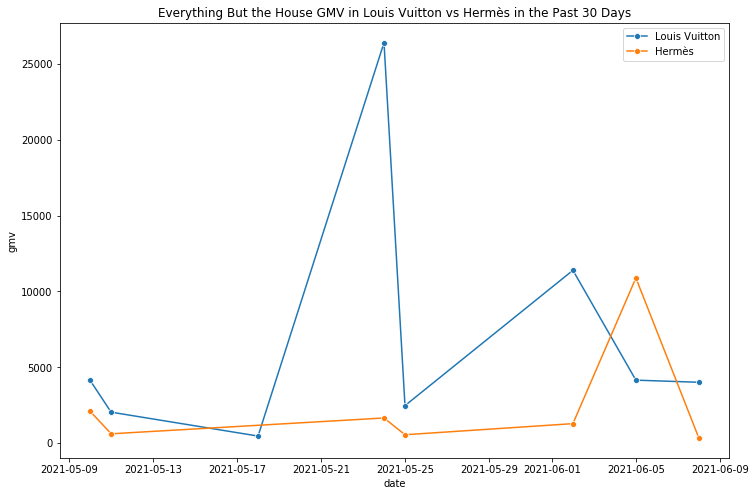

In [190]:
plt.figure(figsize=(12,8))
sns.lineplot(x=ebth_lv['submitted_date'].dt.date.unique(),
            y=list(ebth_lv.groupby(ebth_lv['submitted_date'].dt.date)['price'].sum()),
            marker='o', label='Louis Vuitton')
sns.lineplot(x=ebth_hermes['submitted_date'].dt.date.unique(),
            y=list(ebth_hermes.groupby(ebth_hermes['submitted_date'].dt.date)['price'].sum()),
            marker='o', label='Hermès')
plt.title('Everything But the House GMV in Louis Vuitton vs Hermès in the Past 30 Days')
plt.ylabel('gmv')
plt.xlabel('date')
plt.show()

In [191]:
ebth_lv['price'].mean()

329.68263473053895

In [192]:
ebth_hermes['price'].mean()

212.3780487804878

In [199]:
bid=pd.read_csv('all_bid.csv')

/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [202]:
bid['bid_placed_on']=pd.to_datetime(bid['bid_placed_on'])
bid_30=bid.loc[bid['bid_placed_on']>datetime.datetime(2021,5,7)]

In [215]:
stock_6m=stock.loc[stock['submitted_date']>datetime.datetime(2020,12,1)]
se=stock_6m[stock_6m['buyer']=='style encore stuart']

In [216]:
se['price'].mean()

433.3333333333333

In [221]:
bid_6m=bid.loc[bid['bid_placed_on']>datetime.datetime(2020,12,1)]
se_b=bid_6m[bid_6m['buyer']=='style encore stuart']
se_b

,auction_id,user_id,buyer,item_id,brand_name,category_name,title,overall_grade,bid,min_bid,winning_price,bid_placed_on,hour,day,date,auction_name,buyer_id,win,within_10
141,250,201693.0,style encore stuart,2134786,Louis Vuitton,Totes,Louis Vuitton Neverfull PM,A,678,0.00,NaN,2021-01-03 11:34:00,11.0,6.0,1/3/21,Aucnet Low,NaN,N,N
2103,254,201693.0,style encore stuart,2174920,Louis Vuitton,Totes,"Neverfull MM, Monogram",A,1150,705.60,1320.0,2021-01-15 02:05:00,2.0,4.0,1/15/21,Val Bags & Jewelry,NaN,N,N
2107,254,201693.0,style encore stuart,2175172,Louis Vuitton,Totes,Louis Vuitton Epi Neverfull MM M54546 UB0177 w...,A,1150,705.60,1553.0,2021-01-15 02:09:00,2.0,4.0,1/15/21,Val Bags & Jewelry,NaN,N,N
50111,328,NaN,style encore stuart,2756944,Hermès,Totes,Hermès Garden Party MM Toile Officier Khaki Si...,B,425,324.29,1097.0,2021-05-31 21:00:00,21.0,0.0,5/31/21,Val Bags & Jewelry,NaN,N,N
50112,328,NaN,style encore stuart,2756169,Goyard,Totes,Goyard Artois PM Tote bag Brown,AB,813,648.58,1818.0,2021-05-31 21:06:00,21.0,0.0,5/31/21,Val Bags & Jewelry,NaN,N,N
50113,328,NaN,style encore stuart,2756838,Louis Vuitton,Totes,Louis Vuitton Monogram Pumpkin Dot Neverfull M...,B,1513,1232.30,1744.0,2021-05-31 21:09:00,21.0,0.0,5/31/21,Val Bags & Jewelry,NaN,N,N
50114,328,NaN,style encore stuart,2756712,Louis Vuitton,Totes,Louis Vuitton Monogram Ikat Flower Neverfull ...,AB,1433,1093.32,1840.0,2021-05-31 21:14:00,21.0,0.0,5/31/21,Val Bags & Jewelry,NaN,N,N
50115,328,NaN,style encore stuart,2757104,Gucci,Handbags,Gucci Logo Print Leather Sling backpack White ...,A,485,379.88,588.0,2021-05-31 21:16:00,21.0,0.0,5/31/21,Val Bags & Jewelry,NaN,N,N
95834,246,NaN,style encore stuart,2094577,Louis Vuitton,Totes,"Louis Vuitton Neverfull Mm, Damier Ebene",A,1001,191.12,NaN,2020-12-13 12:42:00,NaN,NaN,NaN,NaN,201693.0,N,N
96373,244,NaN,style encore stuart,2085809,Louis Vuitton,Totes,Louis Vuitton Monogram Neverfull MM M40156 SP1122,AB,800,536.85,916.0,2020-12-14 22:21:00,NaN,NaN,NaN,NaN,201693.0,N,N


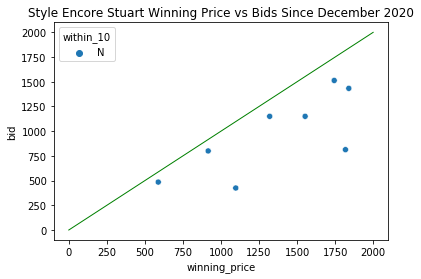

In [227]:
sns.scatterplot(x='winning_price', y='bid', data=se_b, hue='within_10')
plt.plot([2000, 0], [2000, 0], linewidth=1, color='green')
plt.title('Style Encore Stuart Winning Price vs Bids Since December 2020')
plt.show()